<a href="https://colab.research.google.com/github/KarolineCostadaSilva/Pos_ciencia_dados_ufpe/blob/main/Prog_aprend_maquina/Problema_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problema 02

Fazer a análise do dataset do Titanic. Limpeza, Preparação e Análise Exploratória dos Dados(não é necessário fazer previsões (modelos), basta analisar e organizar o dataset) usando Jupyter Notebook.

##Comentários
**Descrição do dataset**<br>
PassengerId	= A unique ID to each Passenger; 1-891<br>
Survived	  = A boolean variable; 1 - Survived, 0 - Dead <br>
Pclass	    = Ticket Class; 1 - 1st, 2 - 2nd, 3 - 3rd class <br>
Name	      = Passenger Name <br>
Sex	        = Sex of Passenger <br>
Age	        = Age in Years <br>
SibSp	      = Number of Siblings / Spouses Aboard <br>
Parch	      = Number of parents / children aboard the titanic <br>
Ticket	    = Ticket number <br>
Fare	      = Passenger Fare <br>
Cabin	      = Cabin number <br>
Embarked	  = Port of Embarkation; C - Cherbourg, Q - Queenstown, S - Southampton <br><br>

**Considerações sobre as variáveis** <br>
Pclass <br>
1st = Superior
2nd = Meio
3rd = Inferior

SibSp <br>
Sibling = irmão, irmã <br>
Spouse = marido, esposa <br>

Parch <br>
Parent = pai, mãe <br>
Child = filhos <br>
Algumas criaças viajaram sozinhas com babá, neste caso parch=0

# 1. Leitura do Dataset

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd

# Carregar o dataset do Titanic
file_path = '/content/titanic-data.csv'
titanic_data = pd.read_csv(file_path)

# Visualizar as primeiras linhas do dataset para entender sua estrutura
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Limpeza dos Dados

In [2]:
# Verificar a quantidade de valores ausentes para cada coluna
missing_values = titanic_data.isnull().sum()

# Calcular a porcentagem de dados ausentes para cada coluna
missing_percentage = (missing_values / len(titanic_data)) * 100

# Juntar as informações em um DataFrame para melhor visualização
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

missing_info.sort_values(by='Percentage', ascending=False)


,Missing Values,Percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


# 3. Preparação dos dados

In [3]:
# Descartar a coluna Cabin
titanic_data_cleaned = titanic_data.drop('Cabin', axis=1)

# Imputar a coluna Age com a mediana
titanic_data_cleaned['Age'].fillna(titanic_data_cleaned['Age'].median(), inplace=True)

# Imputar a coluna Embarked com o valor mais frequente
most_frequent_embarked = titanic_data_cleaned['Embarked'].mode()[0]
titanic_data_cleaned['Embarked'].fillna(most_frequent_embarked, inplace=True)

# Verificar novamente a quantidade de valores ausentes para garantir a limpeza
missing_values_after_cleaning = titanic_data_cleaned.isnull().sum()

missing_values_after_cleaning


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [4]:
# Realizar a codificação one-hot para as variáveis categóricas Sex e Embarked
titanic_data_prepared = pd.get_dummies(titanic_data_cleaned, columns=['Sex', 'Embarked'])

# Visualizar as primeiras linhas do dataset para confirmar as transformações
titanic_data_prepared.head()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1


# 4. Análise Exploratória dos Dados (EDA)

- Taxa de sobrevivência geral.
- Taxa de sobrevivência por sexo.
- Taxa de sobrevivência por classe de passageiro (Pclass).
- Distribuição de idades dos passageiros.
- Influência do preço da tarifa na sobrevivência.
- Relação entre o local de embarque e a sobrevivência.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir o estilo dos gráficos
sns.set(style="whitegrid")

# Taxa de sobrevivência geral
survival_rate = titanic_data_prepared['Survived'].mean() * 100

# Taxa de sobrevivência por sexo
survival_by_sex = titanic_data_prepared.groupby('Sex_female')['Survived'].mean() * 100

# Taxa de sobrevivência por classe de passageiro
survival_by_class = titanic_data_prepared.groupby('Pclass')['Survived'].mean() * 100

# Preparar os dados para plotagem da distribuição de idades
age_distribution_survived = titanic_data_prepared[titanic_data_prepared['Survived'] == 1]['Age']
age_distribution_not_survived = titanic_data_prepared[titanic_data_prepared['Survived'] == 0]['Age']

# Relação entre o preço da tarifa e a sobrevivência
fare_survival_corr = titanic_data_prepared['Fare'].corr(titanic_data_prepared['Survived'])

# Taxa de sobrevivência por local de embarque
survival_by_embarked = titanic_data_prepared[['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Survived']].corr().loc['Survived'][0:3] * 100


In [11]:
print(f'Taxa de Sobrevivência Geral: {round(survival_rate)}%')
print(f'Taxa de Sobrevivência por Sexo: Feminino - {round(survival_by_sex[1])}% / Masculino - {round(survival_by_sex[0])}%')
print(f'Taxa de Sobrevivência por Classe de Passageiro: 1 Classe - {round(survival_by_class[1])}% / 2 Classe - {round(survival_by_class[2])}% / 3 Classe - {round(survival_by_class[3])}%')
print(f'Correlação entre Preço da Tarifa e Sobrevivência: {fare_survival_corr}%')
print(f'Taxa de Sobrevivência por Local de Embarque: Cherbourg (C) - {round(survival_by_embarked[0])}% / Queenstown (Q) {round(survival_by_embarked[1])}% / Southampton (S) {round(survival_by_embarked[2])}%')


Taxa de Sobrevivência Geral: 38%
Taxa de Sobrevivência por Sexo: Feminino - 74% / Masculino - 19%
Taxa de Sobrevivência por Classe de Passageiro: 1 Classe - 63% / 2 Classe - 47% / 3 Classe - 24%
Correlação entre Preço da Tarifa e Sobrevivência: 0.2573065223849625%
Taxa de Sobrevivência por Local de Embarque: Cherbourg (C) - 17% / Queenstown (Q) 0% / Southampton (S) -15%


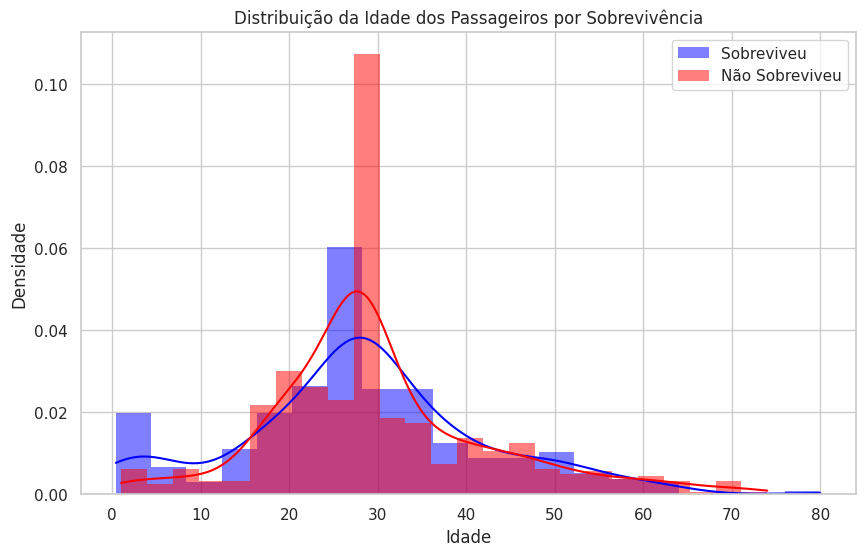

In [6]:
# Plotar a distribuição das idades dos passageiros, separadas por sobrevivência
plt.figure(figsize=(10, 6))
sns.histplot(age_distribution_survived, color="blue", kde=True, stat="density", linewidth=0, label="Sobreviveu")
sns.histplot(age_distribution_not_survived, color="red", kde=True, stat="density", linewidth=0, label="Não Sobreviveu")
plt.title('Distribuição da Idade dos Passageiros por Sobrevivência')
plt.xlabel('Idade')
plt.ylabel('Densidade')
plt.legend()
plt.show()


- Taxa de Sobrevivência por Classe de Passageiro
- Taxa de Sobrevivência por Sexo
- Taxa de Sobrevivência por Porto de Embarque
- Relação entre Tarifa e Sobrevivência

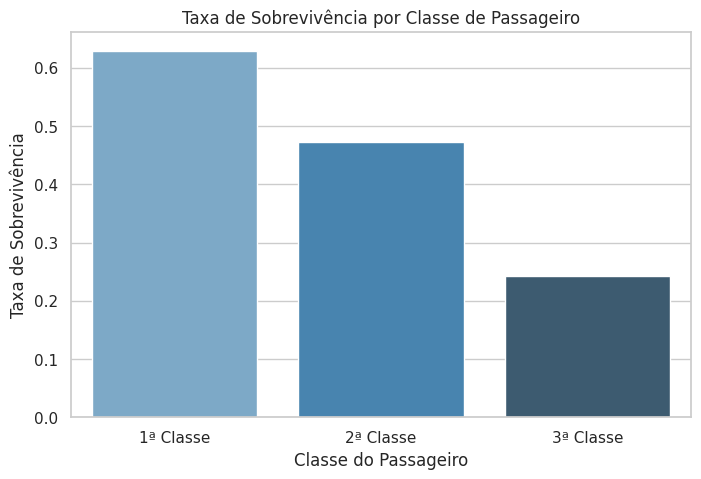

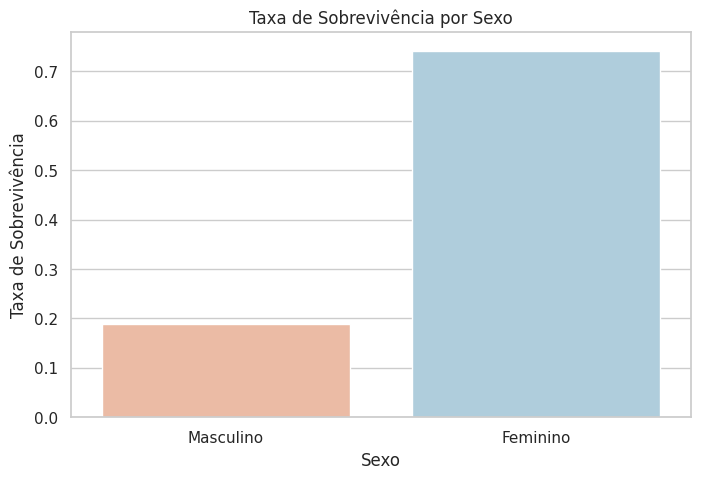

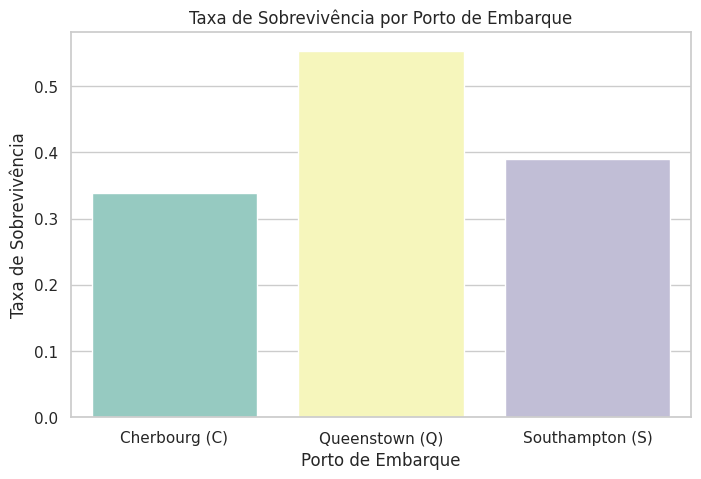

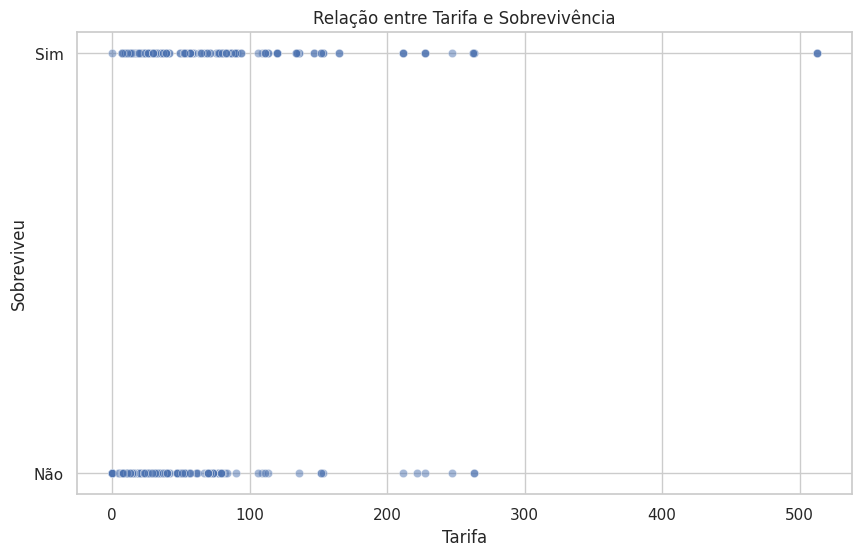

In [15]:
# Taxa de sobrevivência por classe de passageiro
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=titanic_data_prepared, ci=None, palette='Blues_d')
plt.title('Taxa de Sobrevivência por Classe de Passageiro')
plt.xlabel('Classe do Passageiro')
plt.ylabel('Taxa de Sobrevivência')
plt.xticks([0, 1, 2], ['1ª Classe', '2ª Classe', '3ª Classe'])
plt.show()

# Taxa de sobrevivência por sexo
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex_female', y='Survived', data=titanic_data_prepared, ci=None, palette='RdBu')
plt.title('Taxa de Sobrevivência por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Taxa de Sobrevivência')
plt.xticks([0, 1], ['Masculino', 'Feminino'])
plt.show()

# Taxa de sobrevivência por porto de embarque
plt.figure(figsize=(8, 5))
sns.barplot(x='Embarked', y='Survived', data=titanic_data_cleaned, ci=None, palette='Set3')
plt.title('Taxa de Sobrevivência por Porto de Embarque')
plt.xlabel('Porto de Embarque')
plt.ylabel('Taxa de Sobrevivência')
plt.xticks([0, 1, 2], ['Cherbourg (C)', 'Queenstown (Q)', 'Southampton (S)'])
plt.show()

# Relação entre tarifa e sobrevivência
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fare', y='Survived', data=titanic_data_prepared, alpha=0.5)
plt.title('Relação entre Tarifa e Sobrevivência')
plt.xlabel('Tarifa')
plt.ylabel('Sobreviveu')
plt.yticks([0, 1], ['Não', 'Sim'])
plt.show()


- Distribuição de Idade por Classe de Passageiro
- Número de Passageiros por Porto de Embarque
- Tarifa por Classe de Passageiro
- Sobreviventes por Número de Parentes a Bordo (SibSp + Parch)

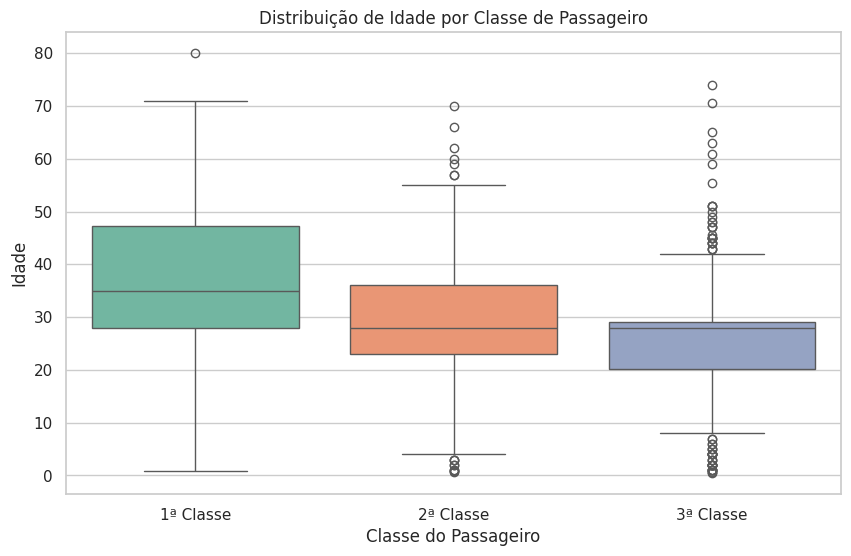

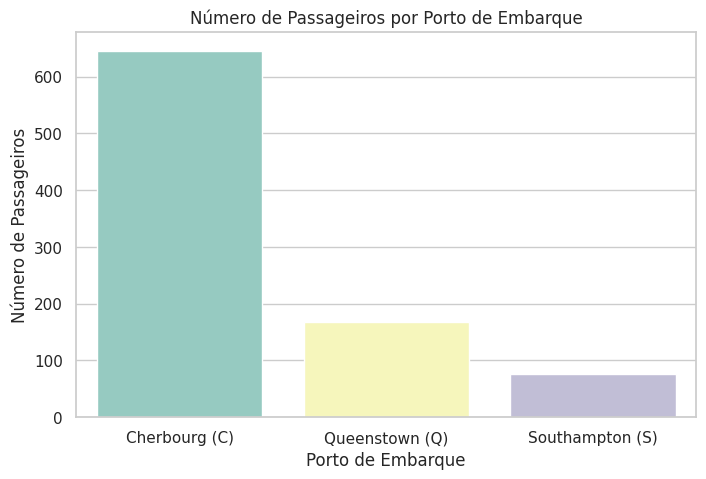

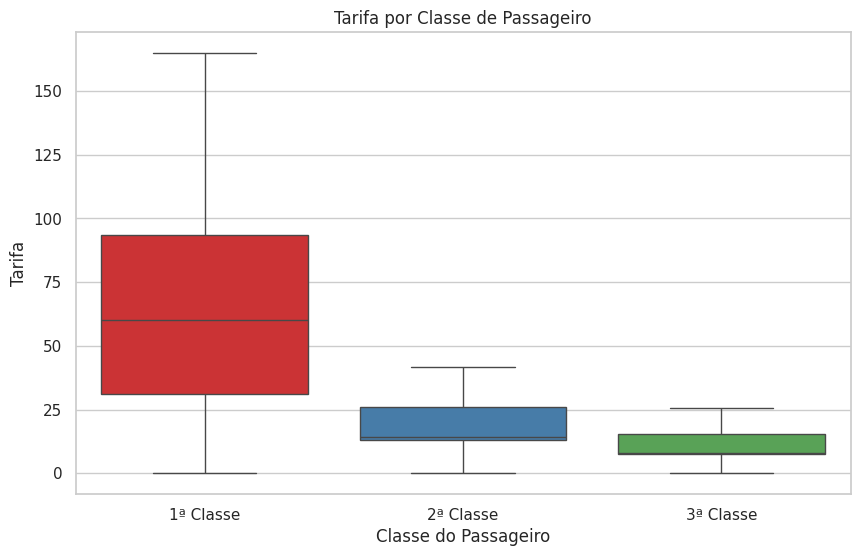

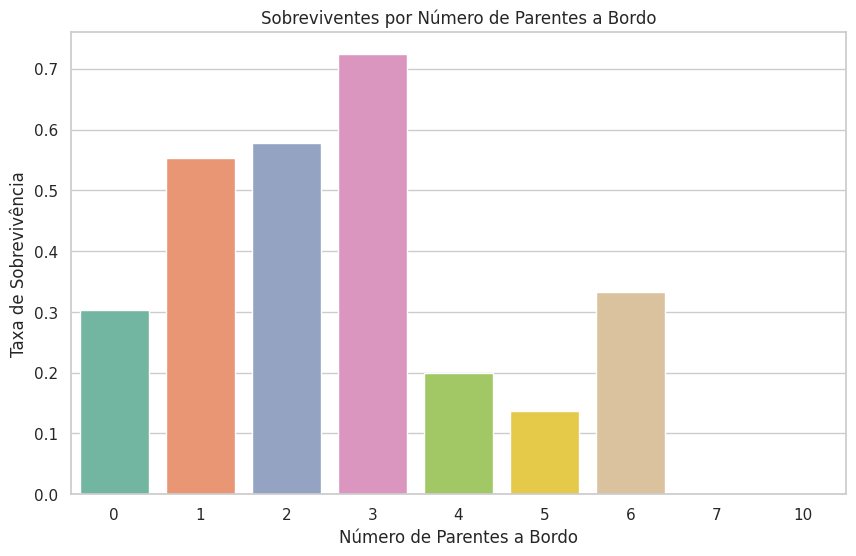

In [16]:
# Distribuição de Idade por Classe de Passageiro
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=titanic_data_prepared, palette='Set2')
plt.title('Distribuição de Idade por Classe de Passageiro')
plt.xlabel('Classe do Passageiro')
plt.ylabel('Idade')
plt.xticks([0, 1, 2], ['1ª Classe', '2ª Classe', '3ª Classe'])
plt.show()

# Número de Passageiros por Porto de Embarque
plt.figure(figsize=(8, 5))
sns.countplot(x='Embarked', data=titanic_data_cleaned, palette='Set3')
plt.title('Número de Passageiros por Porto de Embarque')
plt.xlabel('Porto de Embarque')
plt.ylabel('Número de Passageiros')
plt.xticks([0, 1, 2], ['Cherbourg (C)', 'Queenstown (Q)', 'Southampton (S)'])
plt.show()

# Tarifa por Classe de Passageiro
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=titanic_data_prepared, palette='Set1', showfliers=False)
plt.title('Tarifa por Classe de Passageiro')
plt.xlabel('Classe do Passageiro')
plt.ylabel('Tarifa')
plt.xticks([0, 1, 2], ['1ª Classe', '2ª Classe', '3ª Classe'])
plt.show()

# Sobreviventes por Número de Parentes a Bordo (SibSp + Parch)
titanic_data_prepared['Family_Size'] = titanic_data_prepared['SibSp'] + titanic_data_prepared['Parch']
plt.figure(figsize=(10, 6))
sns.barplot(x='Family_Size', y='Survived', data=titanic_data_prepared, ci=None, palette='Set2')
plt.title('Sobreviventes por Número de Parentes a Bordo')
plt.xlabel('Número de Parentes a Bordo')
plt.ylabel('Taxa de Sobrevivência')
plt.show()


- Sobrevivência por Faixa Etária
- Distribuição de Tarifas por Sobrevivência
- Número de Sobreviventes por Sexo e Classe
- Localização de Embarque vs. Classe
- Sobrevivência com base no Tamanho da Família e Classe

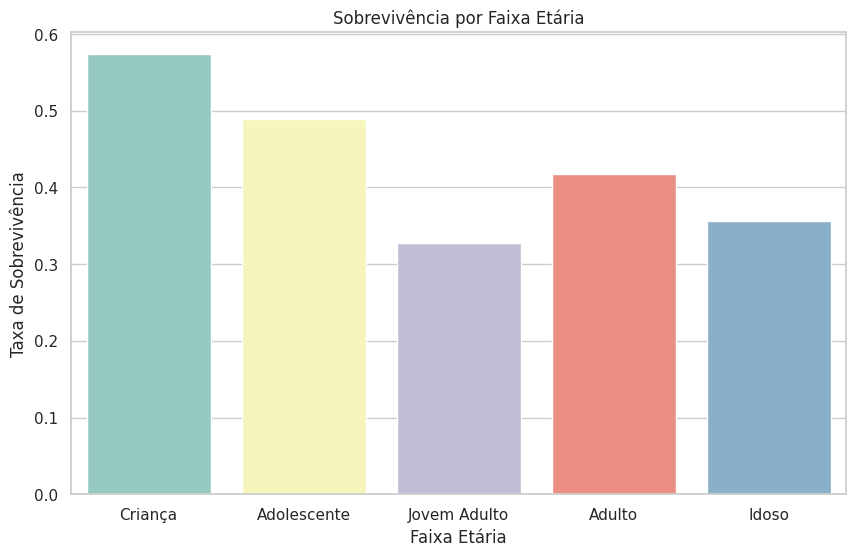

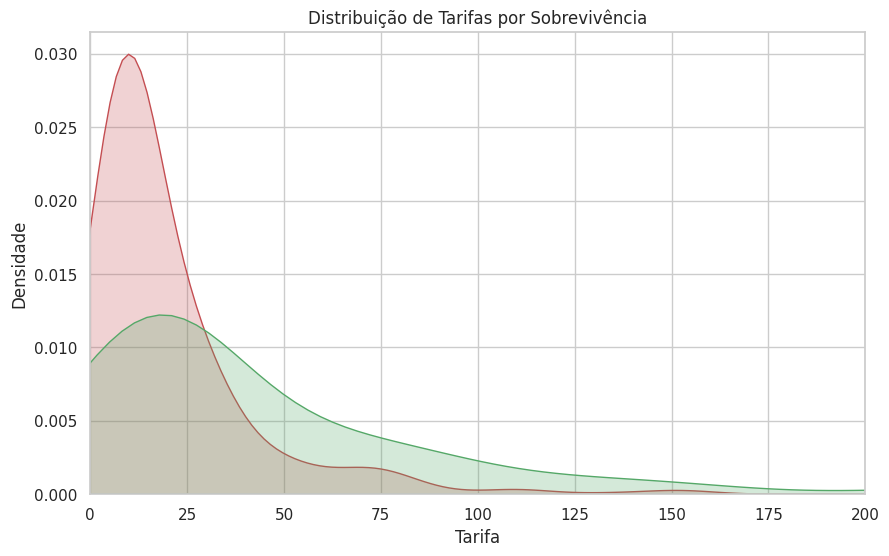

<Figure size 1000x600 with 0 Axes>

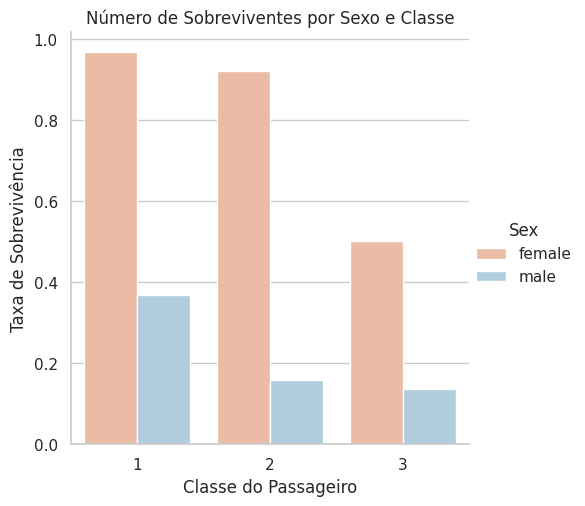

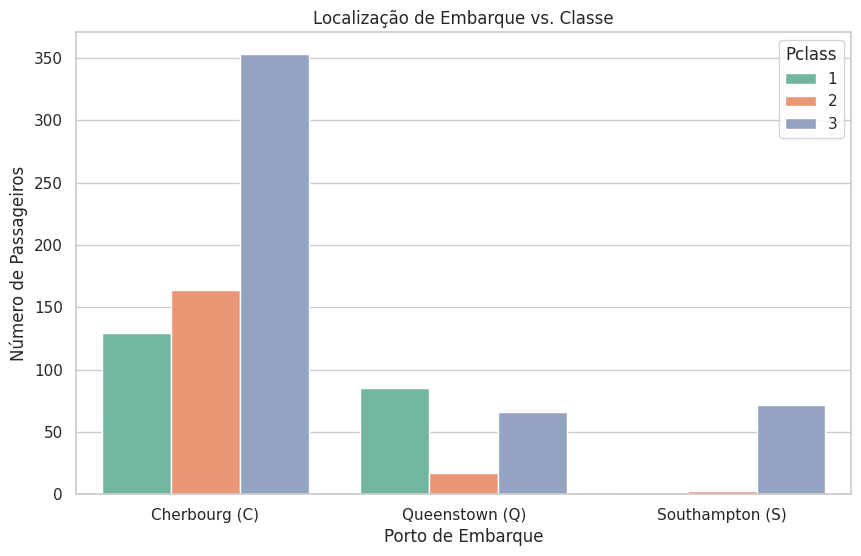

In [17]:
# Criação de faixas etárias para análise
bins = [0, 12, 18, 30, 50, 80]
labels = ['Criança', 'Adolescente', 'Jovem Adulto', 'Adulto', 'Idoso']
titanic_data_prepared['AgeGroup'] = pd.cut(titanic_data_prepared['Age'], bins=bins, labels=labels, right=False)

# Sobrevivência por Faixa Etária
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Survived', data=titanic_data_prepared, ci=None, palette='Set3')
plt.title('Sobrevivência por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Taxa de Sobrevivência')
plt.show()

# Distribuição de Tarifas por Sobrevivência
plt.figure(figsize=(10, 6))
sns.kdeplot(data=titanic_data_prepared[titanic_data_prepared['Survived'] == 0]['Fare'], shade=True, label='Não Sobreviveu', color="r")
sns.kdeplot(data=titanic_data_prepared[titanic_data_prepared['Survived'] == 1]['Fare'], shade=True, label='Sobreviveu', color="g")
plt.title('Distribuição de Tarifas por Sobrevivência')
plt.xlabel('Tarifa')
plt.ylabel('Densidade')
plt.xlim(0, 200)  # Limitar o eixo x para focar na maior parte da distribuição
plt.show()

# Número de Sobreviventes por Sexo e Classe
plt.figure(figsize=(10, 6))
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='bar', data=titanic_data_cleaned, palette='RdBu', ci=None)
plt.title('Número de Sobreviventes por Sexo e Classe')
plt.xlabel('Classe do Passageiro')
plt.ylabel('Taxa de Sobrevivência')

# Localização de Embarque vs. Classe
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', hue='Pclass', data=titanic_data_cleaned, palette='Set2')
plt.title('Localização de Embarque vs. Classe')
plt.xlabel('Porto de Embarque')
plt.ylabel('Número de Passageiros')
plt.xticks([0, 1, 2], ['Cherbourg (C)', 'Queenstown (Q)', 'Southampton (S)'])
plt.show()



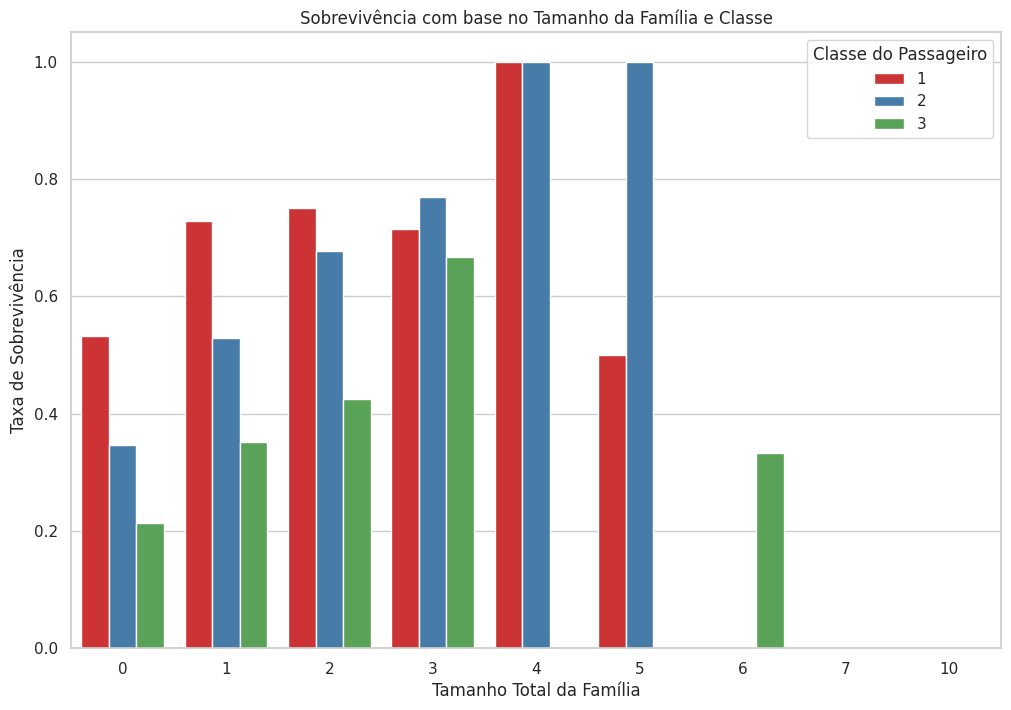

In [18]:
# Criar uma coluna combinando SibSp e Parch para o tamanho total da família
titanic_data_prepared['Total_Family_Size'] = titanic_data_prepared['SibSp'] + titanic_data_prepared['Parch']

# Sobrevivência com base no Tamanho da Família e Classe
plt.figure(figsize=(12, 8))
sns.barplot(x='Total_Family_Size', y='Survived', hue='Pclass', data=titanic_data_prepared, ci=None, palette='Set1')
plt.title('Sobrevivência com base no Tamanho da Família e Classe')
plt.xlabel('Tamanho Total da Família')
plt.ylabel('Taxa de Sobrevivência')
plt.legend(title='Classe do Passageiro', loc='upper right')
plt.show()


## Insights

A distribuição da idade dos passageiros, separada por sobrevivência, revela várias observações interessantes:

- Há uma maior densidade de passageiros jovens entre os sobreviventes, especialmente crianças abaixo dos 10 anos, sugerindo que houve um esforço para salvar crianças.
- A densidade de passageiros que não sobreviveram aumenta significativamente na faixa etária de 20 a 30 anos, possivelmente refletindo a maior proporção de passageiros jovens adultos na 3ª classe, que teve uma taxa de sobrevivência mais baixa.
- Para idades mais avançadas, a distribuição é relativamente mais uniforme, com uma leve tendência de menor sobrevivência conforme a idade aumenta.
- **Fatores como ser mulher, criança, ou viajar em uma classe superior parecem ter aumentado significativamente as chances de sobrevivência.**

**Taxa de Sobrevivência por Classe de Passageiro:** Mostra claramente que passageiros da 1ª classe tiveram uma taxa de sobrevivência significativamente mais alta em comparação com aqueles na 2ª e 3ª classes. Isso indica a influência do status socioeconômico na sobrevivência.

**Taxa de Sobrevivência por Sexo:** Reforça a observação anterior de que mulheres tiveram uma taxa de sobrevivência muito mais alta do que homens, destacando o princípio do "mulheres e crianças primeiro" durante o desastre.

**Taxa de Sobrevivência por Porto de Embarque:** Revela variações interessantes nas taxas de sobrevivência entre os passageiros com base em seu porto de embarque. Passageiros que embarcaram em Cherbourg (C) tiveram uma taxa de sobrevivência mais alta, o que pode refletir diferenças nas classes de bilhetes compradas ou outras características sociodemográficas.

**Relação entre Tarifa e Sobrevivência:** O scatter plot sugere uma correlação positiva entre a tarifa paga e a sobrevivência. Passageiros que pagaram tarifas mais altas, provavelmente ocupando cabines de classes superiores, tiveram melhores chances de sobrevivência.

**Distribuição de Idade por Classe de Passageiro:** Este gráfico mostra que passageiros da 1ª classe tendem a ser mais velhos que aqueles na 2ª e 3ª classes. A 1ª classe tem uma gama mais ampla de idades, indicando diversidade socioeconômica dentro dessa classe.

**Número de Passageiros por Porto de Embarque:** A maioria dos passageiros embarcou em Southampton, seguido por Cherbourg e Queenstown. Isso reflete as rotas e a popularidade dos portos naquela época.

**Tarifa por Classe de Passageiro:** As tarifas variam significativamente entre as classes, com a 1ª classe pagando muito mais do que as outras. A exclusão de outliers neste gráfico ajudou a focar na distribuição geral das tarifas, mostrando a disparidade econômica entre as classes.

**Sobreviventes por Número de Parentes a Bordo (SibSp + Parch):** Há uma tendência de que passageiros sem familiares a bordo ou com muitos familiares tiveram taxas de sobrevivência mais baixas. Aqueles com um a três parentes a bordo parecem ter tido uma chance melhor de sobrevivência, sugerindo que ter um tamanho de família moderado pode ter facilitado a ajuda mútua ou a evacuação durante o desastre.

**Sobrevivência por Faixa Etária:** Este gráfico mostra as taxas de sobrevivência por diferentes faixas etárias, destacando que crianças tiveram uma taxa de sobrevivência relativamente alta, o que pode refletir o esforço para salvá-las.

**Distribuição de Tarifas por Sobrevivência:** A comparação das distribuições das tarifas pagas por sobreviventes e não sobreviventes indica que sobreviventes tendiam a pagar tarifas mais altas, o que está alinhado com a observação de que passageiros de classes superiores tiveram melhores chances de sobrevivência.

**Número de Sobreviventes por Sexo e Classe:** Esta visualização destaca a interseção entre sexo e classe na sobrevivência dos passageiros, com mulheres na 1ª e 2ª classes tendo as maiores taxas de sobrevivência.

**Localização de Embarque vs. Classe:** O gráfico mostra a distribuição de classes entre os diferentes portos de embarque, indicando, por exemplo, que um número significativo de passageiros da 1ª classe embarcou em Cherbourg (C), enquanto a maioria dos passageiros de Southampton (S) estava na 3ª classe.

**Sobrevivência com base no Tamanho da Família e Classe:** Passageiros viajando sozinhos ou com famílias grandes (mais de 3 membros) geralmente tinham taxas de sobrevivência mais baixas, independentemente da classe. Passageiros da 1ª e 2ª classe com tamanhos de família pequenos a moderados (1 a 3 membros da família) parecem ter tido melhores chances de sobrevivência. A 3ª classe mostra uma tendência de taxas de sobrevivência mais baixas em quase todos os tamanhos de família, com uma ligeira melhoria para aqueles com 1 a 3 membros da família, mas ainda significativamente mais baixa em comparação com as classes superiores.